<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-тестовой-выборки" data-toc-modified-id="Анализ-признаков-тестовой-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков тестовой выборки</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменения-концентраций-металлов" data-toc-modified-id="Изменения-концентраций-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения концентраций металлов</a></span></li><li><span><a href="#Сравние-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравние-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравние распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-sMAPE" data-toc-modified-id="Функция-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция sMAPE</a></span></li><li><span><a href="#Подготовка-обучающих-данных" data-toc-modified-id="Подготовка-обучающих-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка обучающих данных</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Подключим следующие библиотеки:
- `pandas` - для последующей работы с данными и таблицами;
- `numpy` - для установления случайного состояния для воспроизводимости эксперимента;
- `sklearn` для работы с моделями, а именно:
    - `LinearRegression` - модель линейной регрессии;
    - `DecisionTreeRegressor` - модель решающего дерева;
    - `DummyRegressor` - простейшая модель для дальнейшей проверки на адекватность;
    - `cross_val_score` - для проверки кросс-валидацией;
    - `make_scorer` - для создания сздания новой метрик sMAPE;
    - `mean_absolute_eror` - для выичсление MAE;
- `matplotlib.pyplot` для построения графиков;
- `seaborn` также для построения графиков.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

Откроем `.csv` файлы с предоставленными данными, запишем их в файлы `data_train`, `data_test` и `data_full`.
Добавим их в список `data`.

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
try:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

data = [data_train, data_test, data_full]

Выведем первые 10 строк в каждом файле.

In [3]:
for _ in data:
    display(_.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Во всех таблицах очень много различных столбцов, скорее всего часть из них придётся отбросить.

Посмотрим на размеры таблиц.

In [4]:
for _ in data:
    display(_.shape)

(14149, 87)

(5290, 53)

(19439, 87)

В `data_test` содержится 53 столбца, в то время как в остальных двух датафреймах по 87 столбцов. При этом сумма строк первого и второго датафреймов равна сумме строк в третьем датафрейме (вероятно он представляет из себя объединение train и test датафреймов). Возможно во втором датафрейме отсутствует часть данных, котрые содержатся в первом и третьем, а также как известно отсутствует целевой признак. Проверим вхождение столбцов в 1-й и 3-й датафреймы.

In [5]:
print(data_train.loc[:, data_test.columns].shape)
print(data_full.loc[:, data_test.columns].shape)

(14149, 53)
(19439, 53)


Да, это верное предположение - в датафрейме `data_test` содержатся не все столбцы из двух других датафреймов, но все столбцы из `data_test` содержатся в `data_train` и `data_final`.

Выведем основные данные о колонках методом `info()`.

In [6]:
for _ in data:
    display(_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

Все данные кроме даты представлены в формате `float64`, соответственно они числовые. Также можем заметить, что не везде количество значений одинаковое, соответственно придётся проверить пропуски в данных.

Получим основные статистические данные методом `describe()`.

In [7]:
for _ in data:
    display(_.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

Посчитаем количество и долю пропусков по датафреймам.

In [8]:
print(f'data_train:\n{ - data_train.dropna().shape[0] + data_train.shape[0]}, {( - data_train.dropna().shape[0] + data_train.shape[0]) / data_train.shape[0]}')
print(f'data_test:\n{ - data_test.dropna().shape[0] + data_test.shape[0]}, {( - data_test.dropna().shape[0] + data_test.shape[0]) / data_test.shape[0]}')
print(f'data_full:\n{ - data_full.dropna().shape[0] + data_full.shape[0]}, {( - data_full.dropna().shape[0] + data_full.shape[0]) / data_full.shape[0]}')

data_train:
3132, 0.2213583998869178
data_test:
61, 0.011531190926275992
data_full:
3345, 0.17207675291938887


Доля пропусков достаточно большая, данные требуют предобработки.

### Проверка эффективности обогащения

Проверим правильность расчёта эффективности обогащения на тренировочных данных. Для этого нам понадобятся столбцы `rougher.output.concentrate_au`, `rougher.input.feed_au`, `rogher.output.tail_au`, которые используются в формуле для расчёта Recovery.

In [9]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = c * (f - t) / (f * (c - t)) * 100

Для проверки сравним средние значения данного столбца и стобца `rougher.output.recovery`.

In [10]:
print(recovery.mean())
print(data_train['rougher.output.recovery'].mean())

82.70450164550293
82.70450164550293


Значения совпадают, соответственно можно сказать, что значение расчитано правильно.

Вычислим теперь MAE для наших вычисленных значений и изначальных значений из таблицы.

In [11]:
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


Значение MAE крайне мало, что ещё раз подтверждает, что расчёты произведённые нами и расчёты в таблице совпадают. Возможно MAE возникает из-за погрешности вычисления.

### Анализ признаков тестовой выборки

Рассмотри какие признаки недоступны в тестовой выборке.

In [12]:
for _ in data_train.columns:
    if _ not in data_test.columns:
        print(_)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В датафрейме `data_test` отсутствует некоторые вычисляемые признаки, отсутствуют любые финальные, а также отсутствуют параметры продукта всех этапов (x.output.x). В описании проекта говорится о том, что "Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже", соответственно именно эти параметры и отсутствуют в `data_test`.

Можно сказать, что в `data_test` содержатся только параметры, которыми оперирует и которые может получить установка в процессе обогащения руды, соответственно признкаи выше не известны к моменту начла работы модели, до того как она сделает предсказание.

### Предобработка данных

Как уже упоминалось выше, в датафреймах присутствуют пропуски в достатоочно больших количествах. В описании проекта сказано, что "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи". Соответственно попытаемся заполнить пропуски по соседним по времени данным. Воспользуемся для этого методом `fillna()` с параметром `method=ffill`.

In [13]:
for _ in data:
    _.fillna(axis='index', method='ffill', inplace=True)

Ещё раз проверим наличие пропусков в таблицах.

In [14]:
for _ in data:
    print(_.isna().sum().sum())

0
0
0


Также проверим данные на наличие дубликатов.

In [15]:
for _ in data:
    print(_.duplicated().sum())

0
0
0


Дубликатов в данных нет, можно перейти к анализу данных.

## Анализ данных

### Изменения концентраций металлов

Рассмотрим изменеия концентраций металлов на различных стадиях очистки. Для этого вомпользуемся выборкой датфреймом `data_full`, из которой рассмотрим столбцы `x.output.concentrate_ag`, `x.output.concentrate_pb`, `x.output.concentrate_au`.

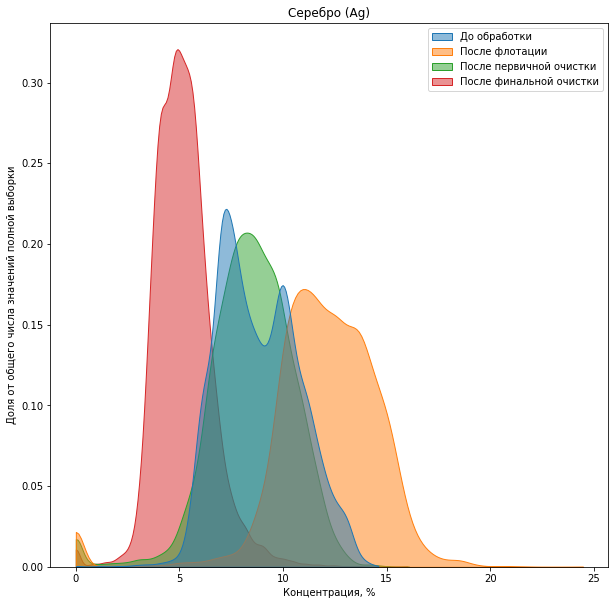

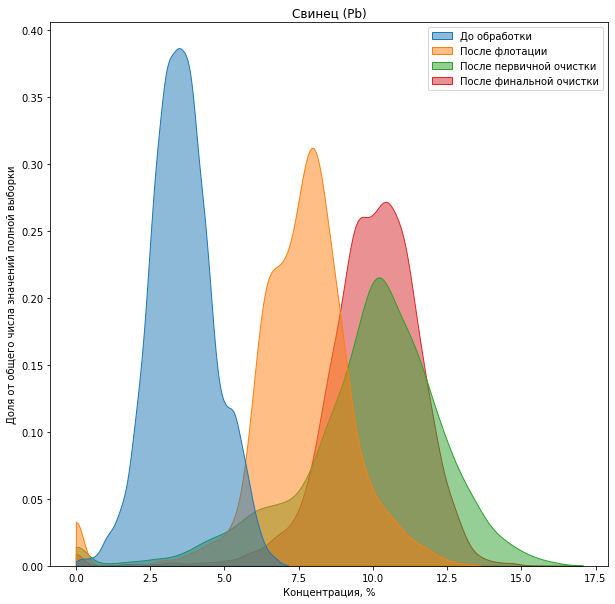

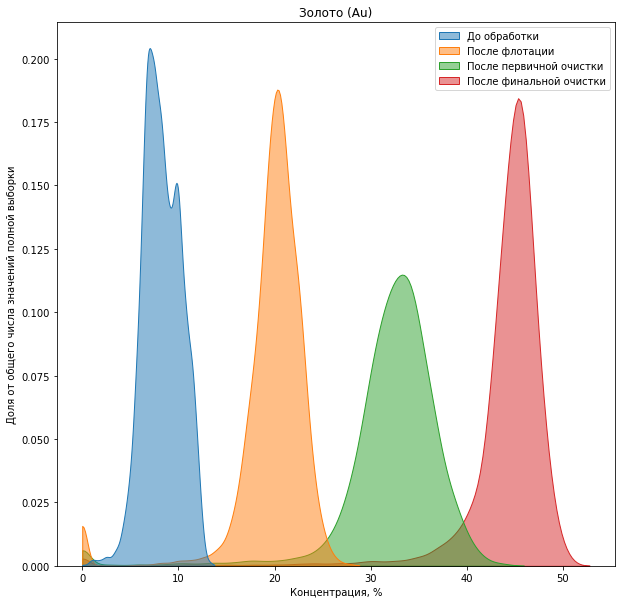

In [16]:
tails = ['.output.concentrate_ag', '.output.concentrate_pb', '.output.concentrate_au']
stages = ['rougher', 'primary_cleaner', 'final']
input_feed = ['rougher.input.feed_ag',  'rougher.input.feed_pb', 'rougher.input.feed_au']
names = ['Серебро (Ag)', 'Свинец (Pb)', 'Золото (Au)']
for i in range(3):
    fig, ax = plt.subplots(figsize=(10, 10))
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    sns.kdeplot(data=data[2][iterate].rename(columns={iterate[0]: 'До обработки', iterate[1]: 'После флотации', iterate[2]: 'После первичной очистки', iterate[3]: 'После финальной очистки'}), fill=True, alpha=.5, common_norm=False, cut=0)
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Доля от общего числа значений полной выборки')
    ax.set_title(names[i])
    plt.show()

На каждом из этапов полученные распределения в целом выглядят одинаково. Соответственно, можно сказать, что различные образцы одинаково реагируют на одни и те же этапы обработки.
Динамика для металлов следующая:
 - Концентрация серебра возрастает после флотации, после первичной обработки снижается до прежних значений, после чего снижается до ещё более низких значений;
 - Концентрация свинца возрастает после флотации и первичной очистки, после чего практически не изменяется после финальной очистки (значения становятся более концентрированными около отметки в 10%);
 - Концентрация золота возрастает примерно на 10% на каждом из этапов обработки.

Заметно, что в данных любого из металлов присутствуют нулевые (или околонулевые значения) на нескольких этапах (цвет столбца меняется по высоте), возможно это означает, что оборудование не смогло зарегистрировать металл в данном случае и это ошибка оборудования. Рассмотрим динамику средних значений на каждом из этапов, а также изучим количество таких нулевых значений.

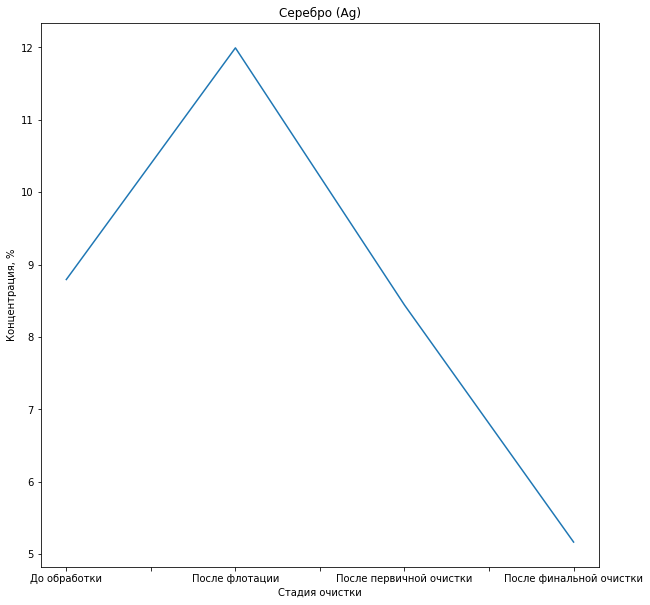

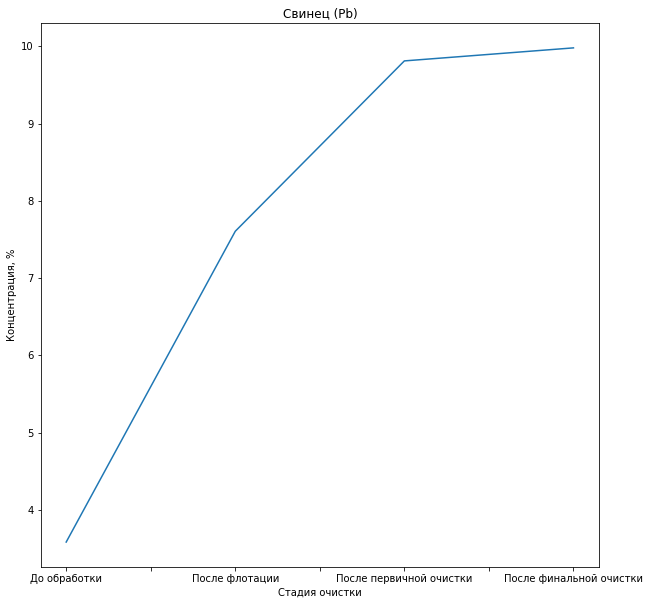

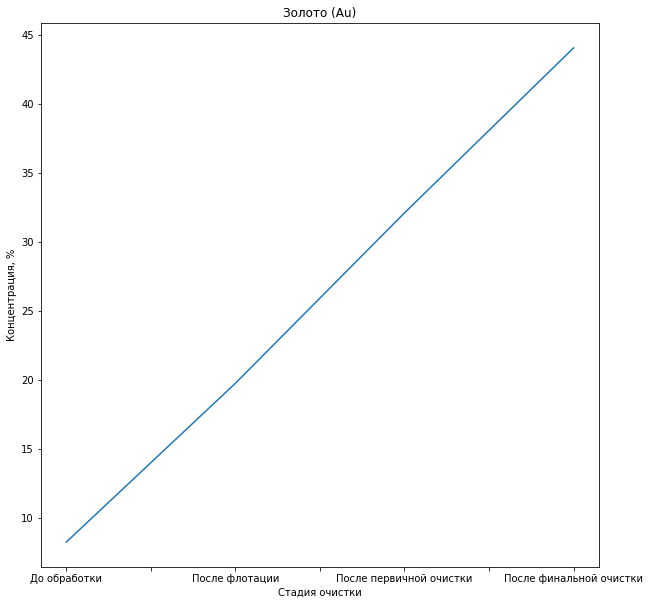

In [17]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(10, 10))
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    data[2][iterate].rename(columns={iterate[0]: 'До обработки', iterate[1]: 'После флотации', iterate[2]: 'После первичной очистки', iterate[3]: 'После финальной очистки'}).mean().plot()
    ax.set_title(names[i])
    ax.set_xlabel('Стадия очистки')
    ax.set_ylabel('Концентрация, %')
    plt.show()

Для каждого из металлов можно сказать следующее:
 - Концентрация серебра повышается после флотации с ~9% до 12%, но снижается на всех остальных этапах очистки до 5% в финальном продукте;
 - Концентрация свинца поднимается с ~3,5% до флотации, до ~7,5% после флотации, до ~9,75% после первичной очистки и затем до ~10% в финальном продукте;
 - Концентрация золота поднимается с ~7% до обработки до ~45% после финального этапа.
 
Изучим количество нулевых и оклонулевых значений по столбцам, будем считать, что минимальная такая концентрация - 0,01%.

In [18]:
for i in range(3):
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    print(names[i])
    for j in range(4):
        print(f'    {iterate[j]}: {data[2][data[2][iterate[j]] < 0.01].shape[0]}')

Серебро (Ag)
    rougher.input.feed_ag: 5
    rougher.output.concentrate_ag: 399
    primary_cleaner.output.concentrate_ag: 225
    final.output.concentrate_ag: 99
Свинец (Pb)
    rougher.input.feed_pb: 5
    rougher.output.concentrate_pb: 399
    primary_cleaner.output.concentrate_pb: 232
    final.output.concentrate_pb: 99
Золото (Au)
    rougher.input.feed_au: 5
    rougher.output.concentrate_au: 399
    primary_cleaner.output.concentrate_au: 225
    final.output.concentrate_au: 99


Строк достаточно небольшое количество, меньше 10% суммарно, отбросим их, чтобы в дальнейшем это не отразилось на моделях.

In [19]:
for i in range(3):
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    for j in range(4):
        zeros_train = data[0][data[0][iterate[j]] <= 0.01]
        zeros_full = data[2][data[2][iterate[j]] <= 0.01]
        print(zeros_train.shape[0])
        print(zeros_full.shape[0])
        data[0].drop(index=zeros_train.index, inplace=True)
        data[2].drop(index=zeros_full.index, inplace=True)
print('---\nПосле удаления')
for i in range(3):
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    for j in range(4):
        zeros_train = data[0][data[0][iterate[j]] <= 0.01]
        zeros_full = data[2][data[2][iterate[j]] <= 0.01]
        print(zeros_train.shape[0])
        print(zeros_full.shape[0])

5
5
297
394
188
220
57
95
0
0
0
0
6
7
0
0
0
0
0
0
0
0
0
0
---
После удаления
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Перестроим графики.

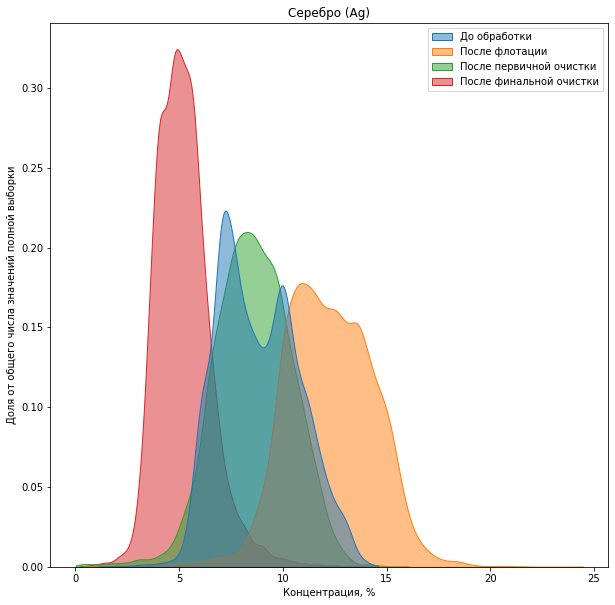

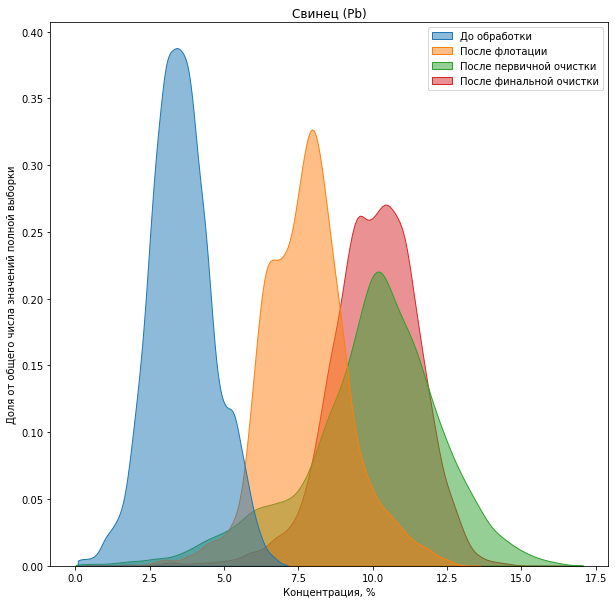

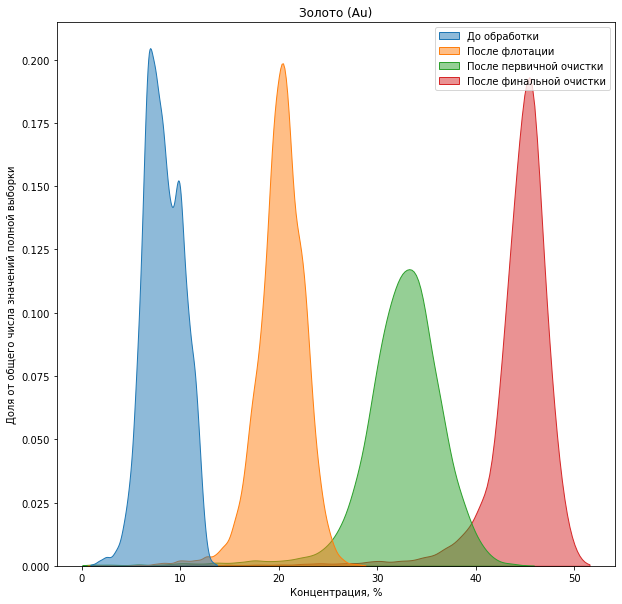

In [20]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(10, 10))
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    sns.kdeplot(data=data[2][iterate].rename(columns={iterate[0]: 'До обработки', iterate[1]: 'После флотации', iterate[2]: 'После первичной очистки', iterate[3]: 'После финальной очистки'}), fill=True, alpha=.5, common_norm=False, cut=0)
    ax.set_xlabel('Концентрация, %')
    ax.set_ylabel('Доля от общего числа значений полной выборки')
    ax.set_title(names[i])
    plt.show()

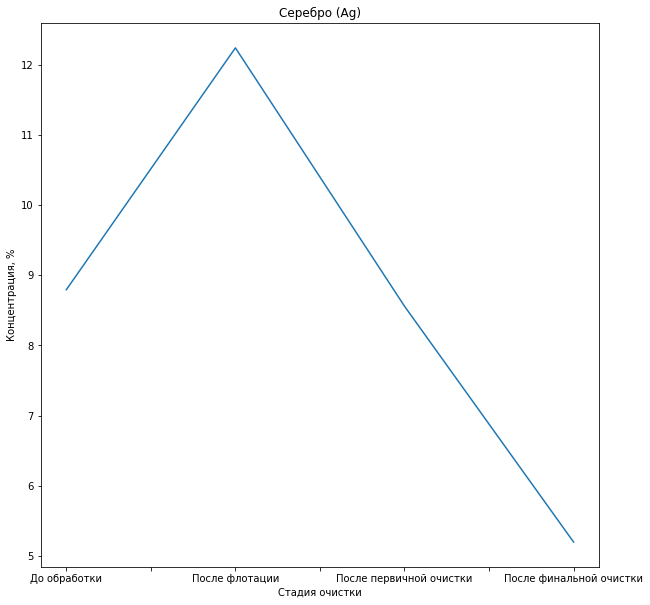

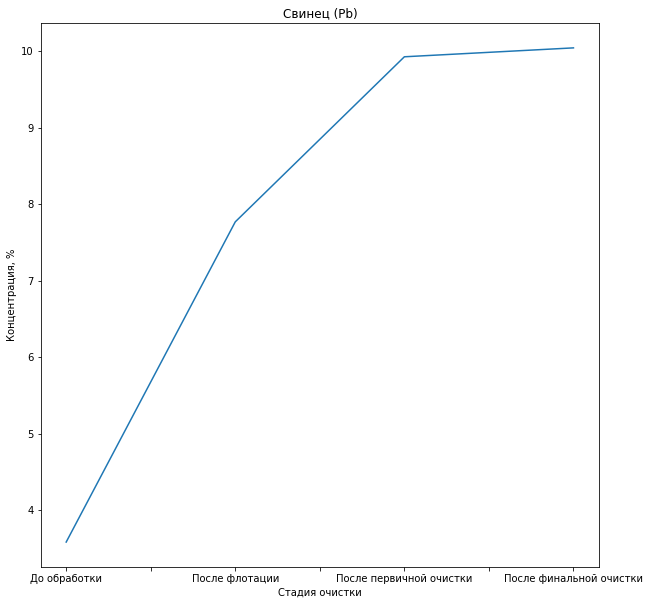

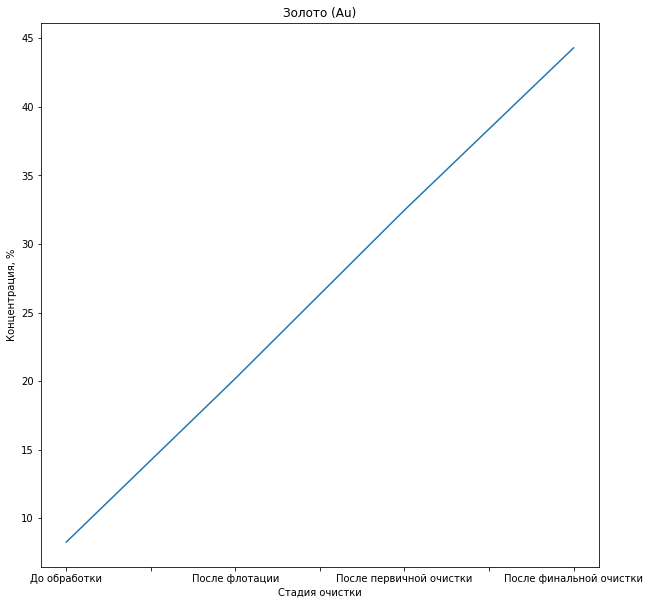

In [21]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(10, 10))
    iterate = [input_feed[i]]
    for j in range(3):
        iterate.append(stages[j] + tails[i])
    data[2][iterate].rename(columns={iterate[0]: 'До обработки', iterate[1]: 'После флотации', iterate[2]: 'После первичной очистки', iterate[3]: 'После финальной очистки'}).mean().plot()
    ax.set_title(names[i])
    ax.set_xlabel('Стадия очистки')
    ax.set_ylabel('Концентрация, %')
    plt.show()

Удаление почти не повлияло на распределения за исключением того, что убрало пик на графиках распредления, как и должно было.

### Сравние распределения размеров гранул сырья на обучающей и тестовой выборках

Рассмотрим распределения размеров гранул сырья на тестовой и обучающей выборках. Для этого воспользуемся столбцами `rogher.input.feed_size` из датафреймов `train` и `test`. Построим их на гистограмме с наложением.

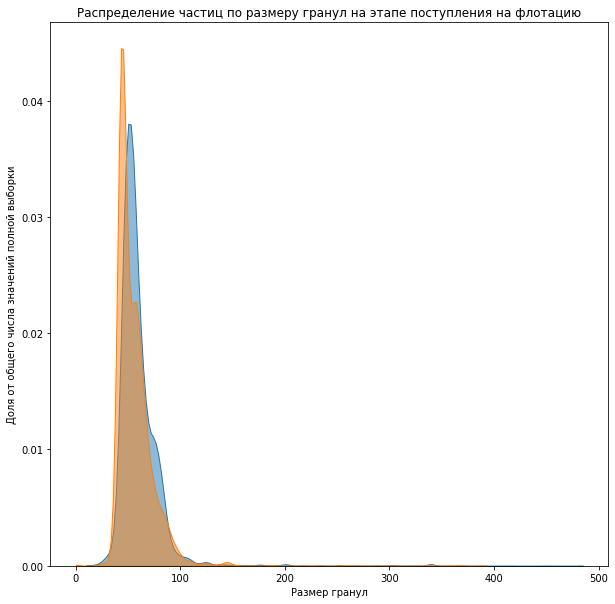

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=data[0]['rougher.input.feed_size'].rename({'rougher.input.feed_size': 'Train'}), fill=True, alpha=.5, common_norm=False, cut=0, label='Train')
sns.kdeplot(data=data[1]['rougher.input.feed_size'].rename({'rougher.input.feed_size': 'Test'}), fill=True, alpha=.5, common_norm=False, cut=0, label='Test')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Доля от общего числа значений полной выборки')
ax.set_title('Распределение частиц по размеру гранул на этапе поступления на флотацию')
plt.show()

В целом графически распределения размеров частиц на обучающей и тестовой выборках похожи по гистограммам и походи на биномиальное распределение. Воспользуемся методом `describe()` для соответствующих столбцов на выборках, так мы получим статистическую информацию.

In [23]:
display(data[0]['rougher.input.feed_size'].describe())
display(data[1]['rougher.input.feed_size'].describe())

count    13596.000000
mean        60.228115
std         23.181652
min          9.659576
25%         48.983094
50%         55.265845
75%         65.850188
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Средние значения, квантили и стандартные отклонения достаточно похожи, наибольшая разница присутствует в максимальном и минимальном значениях (разница ~20% для максимальных значений и в 200 раз для минимальных значений). По гистограмме можно заметить, что в обучающей выборке присутствуют выбросы в сторону больших частиц в достаточно большом количестве.

По итогам будем считать, что с учётом примерного равенства средних значений, стандартных отклонений и кванителй, распредения одинаковыми.

Изучим аналогичным образом распределения для первичной очистки поле флотации. Потребуются столбцы `primary_cleaner.input.feed_size`.

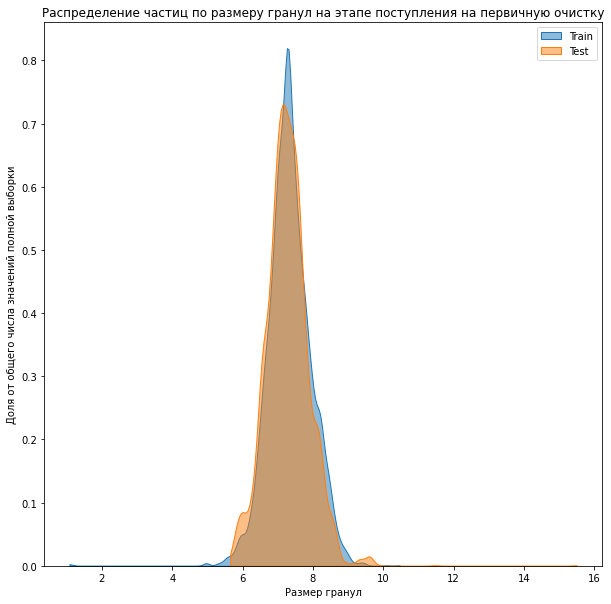

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=data[0]['primary_cleaner.input.feed_size'].rename({'primary_cleaner.input.feed_size': 'Train'}), fill=True, alpha=.5, common_norm=False, cut=0, label='Train')
sns.kdeplot(data=data[1]['primary_cleaner.input.feed_size'].rename({'primary_cleaner.input.feed_size': 'Test'}), fill=True, alpha=.5, common_norm=False, cut=0, label='Test')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Доля от общего числа значений полной выборки')
ax.set_title('Распределение частиц по размеру гранул на этапе поступления на первичную очистку')
plt.legend()
plt.show()

In [25]:
display(data[0]['primary_cleaner.input.feed_size'].describe())
display(data[1]['primary_cleaner.input.feed_size'].describe())

count    13596.000000
mean         7.328879
std          0.614877
min          1.080000
25%          6.970000
50%          7.300000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

В целом состояние данных аналогичное:
 - Распределения в тестовой и тренировочной выборках схожи и похожи на биномиальные (даже больше на стандартные, в том числе об этом же говорят практические равенства медианы и среднего);
 - Статистические данные также схожи друг с другом, большие различия наблюдаются только в максимальном и минимальном значениях.

Также делаем вывод, что распределения в выборках схожи.

### Исследуем суммарную концентрацию всех веществ на разных стадиях.

Построим гистограммы распределения суммарных концентраций металлов на различных этапах очистки. Для этого воспользуемся столбцами `x.output.concentrate_au`, `x.output.concentrate_ag`, `x.output.concentrate_sol`, `x.output.concentrate_pb` и просуммируем эти значения.

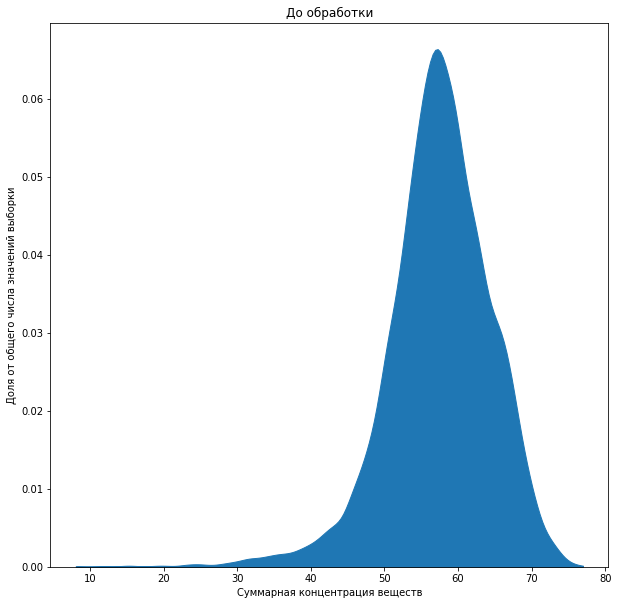

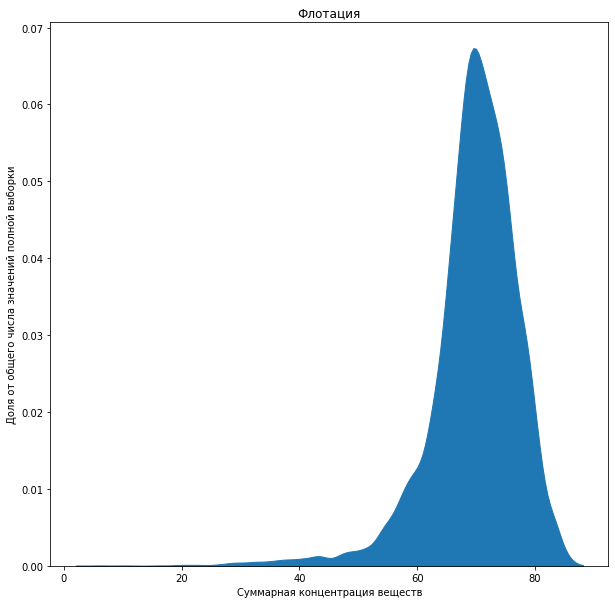

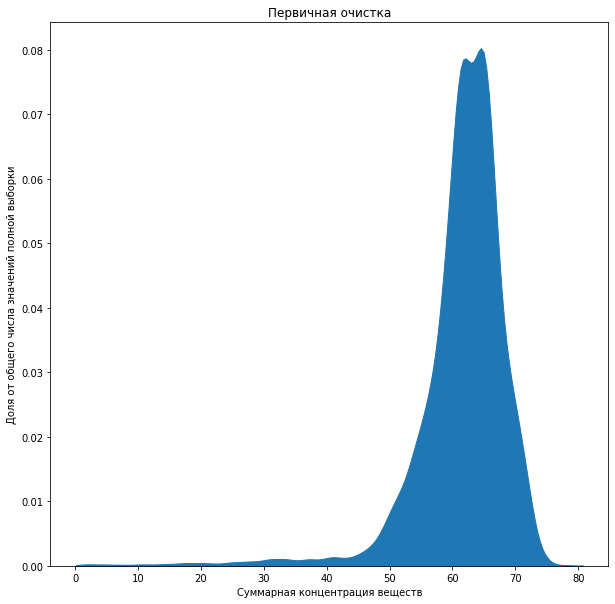

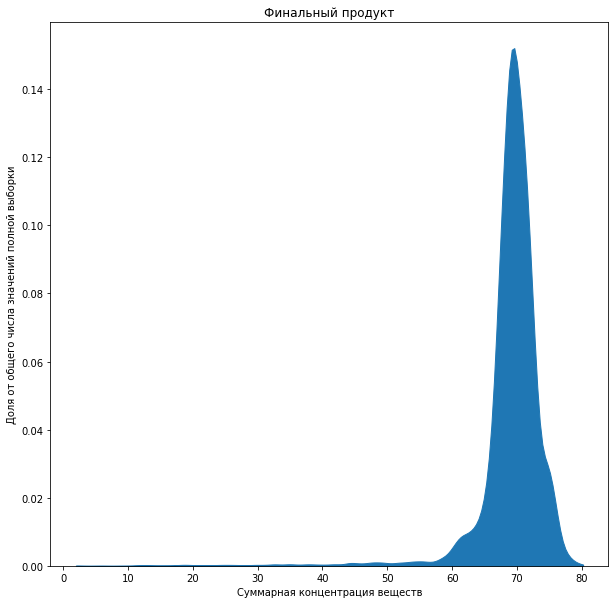

In [26]:
tails = ['.output.concentrate_ag', '.output.concentrate_pb', '.output.concentrate_au', '.output.concentrate_sol']
stages_names = ['Флотация', 'Первичная очистка', 'Финальный продукт']
fig, ax = plt.subplots(figsize=(10, 10))
input_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']
overall_concentrate = data[2][input_feed].sum(axis=1)
sns.kdeplot(data=overall_concentrate, fill=True, alpha=1, common_norm=False, cut=0)
ax.set_xlabel('Суммарная концентрация веществ')
ax.set_ylabel('Доля от общего числа значений выборки')
ax.set_title('До обработки')
plt.show()
for i in range(3):
    fig, ax = plt.subplots(figsize=(10, 10))
    iterate = []
    for j in range(4):
        iterate.append(stages[i] + tails[j])
    overall_concentrate = data[2][iterate].sum(axis=1)
    sns.kdeplot(data=overall_concentrate, fill=True, alpha=1, common_norm=False, cut=0)
    ax.set_xlabel('Суммарная концентрация веществ')
    ax.set_ylabel('Доля от общего числа значений полной выборки')
    ax.set_title(stages_names[i])
    plt.show()

Распределения на всех этапах похожи на биномиальные, в целом концентрация веществ на всех этапах немного повышается, но по большей части концентрируется вокруг значения суммарной концентрации в 70%, хотя н всех этапах и остаётся "хвост" в сторону значений с малой суммарной концентрацией.

## Модель

### Функция sMAPE
Напишем функцию, которая будет выщитывать sMAPE на этапах обогащения чернового и финального концентратов.Будем использовать её как метрику в дальнейшем, поэтому создадим на её основе scorer. Также создадим функцию, которая будет выщитывать итоговый sMAPE.

In [27]:
def smape_scorer(target, predictions):
    return 1 / len(target) * np.sum(np.abs(target - predictions) / (np.abs(predictions) + np.abs(target)) * 2 * 100)
scorer = make_scorer(smape_scorer, greater_is_better=False)

def smape_final(rougher, final):
    return rougher * 0.25 + final * 0.75

### Подготовка обучающих данных

Выделим целевые признаки из выборки `final` и соединим его с датафреймом `test` по столбцу `date`.

In [28]:
print(data[1].shape[0])
data[1] = data[1].merge(data[2][['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

5290


In [29]:
display(data[1].head())
print(data[1].shape[0])

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

5290


Удалим все столбцы, которые есть в обучающей выборке, но которых нет в тренировочной выборке.

In [30]:
data[1].drop(columns=['date'], inplace=True)
deletion = []
for _ in data[0].columns:
    if _ not in data[1].columns:
        deletion.append(_)
data[0].drop(columns=deletion, inplace=True)

Разделим данные на признаки для модели и целевой признак для предсказания `rougher.output.recovery`, `final.output.recovery`.

In [31]:
features_train_rougher = data[0].filter(regex='rougher.*', axis=1)
features_train_rougher.drop(columns=['rougher.output.recovery'], inplace=True)
target_train_rougher = data[0]['rougher.output.recovery']

features_test_rougher = data[1].filter(regex='rougher.*', axis=1)
features_test_rougher.drop(columns=['rougher.output.recovery'], inplace=True)
target_test_rougher = data[1]['rougher.output.recovery']

features_train_final = data[0].copy()
features_train_final.drop(columns=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
target_train_final = data[0]['final.output.recovery']

features_test_final = data[1].copy()
features_test_final.drop(columns=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
target_test_final = data[1]['final.output.recovery']

# Обучение моделей

Обучим модели линейной регрессии, случайного леса и решающего дерева. Начнём с линейной регрессии.

In [32]:
model_linear = LinearRegression()
rougher_predict_linear = cross_val_score(model_linear, features_train_rougher, target_train_rougher, scoring=scorer, cv=5)
final_predict_linear = cross_val_score(model_linear, features_train_final, target_train_final, scoring=scorer, cv=5)
smape_final_value = smape_final(abs(rougher_predict_linear), abs(final_predict_linear)).mean()
print(f'Итоговый sMAPE для линейной регрессии: {smape_final_value}')

Итоговый sMAPE для линейной регрессии: 9.922718236005817


Обучим модель решающего дерева. воспользуемся перебором гиперпараметров модели, сохраним значение итогового sMAPE на каждой итерации, построим графики, а также выведем значения для лучшей модели.

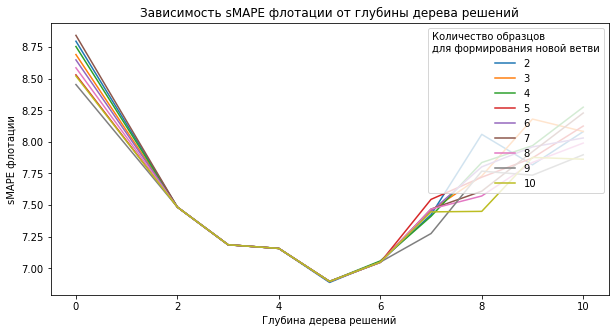

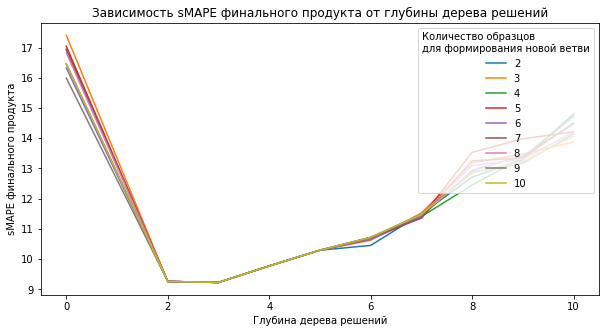

Лучшая модель решающего дерева для черновой обработки:
    Глубина = 5
    Количество образцов = 2
    sMAPE = 6.887653461831674
Лучшая модель решающего дерева для финального продукта:
    Глубина = 3
    Количество образцов = 2
    sMAPE = 9.226261044362976
Лучшая sMAPE для двух лучших моделей: 8.64160914873015


In [33]:
depth_list = [0] + [i for i in range(2, 11)]
best_depth_tree_rougher = 1
best_depth_tree_final = 1
best_rougher_smape = 1000
best_final_smape = 1000
split_list = range(2, 11)
best_split_tree_rougher = 1
best_split_tree_final = 1
fig, ax = plt.subplots(figsize=(10, 5))
for i in split_list:
    rougher_smape_list = []
    for j in [None] + [i for i in range(2, 11)]:
        model_tree_rougher = DecisionTreeRegressor(random_state=12345, max_depth=j, min_samples_split=i)
        rougher_predict_tree = cross_val_score(model_tree_rougher, features_train_rougher, target_train_rougher, scoring=scorer, cv=5)
        rougher_smape_iter = abs(rougher_predict_tree.mean())
        rougher_smape_list.append(abs(rougher_smape_iter))
        if rougher_smape_iter < best_rougher_smape:
            best_model_tree_rougher = model_tree_rougher
            best_rougher_smape = rougher_smape_iter
            best_depth_tree_rougher = j
            best_split_tree_rougher = i
    ax.plot(depth_list, rougher_smape_list, label=i)
ax.set_xlabel('Глубина дерева решений')
ax.set_ylabel('sMAPE флотации')
ax.set_title('Зависимость sMAPE флотации от глубины дерева решений')
ax.legend(loc=1, title='Количество образцов\nдля формирования новой ветви')
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))
for i in split_list:
    final_smape_list = []
    for j in [None] + [i for i in range(2, 11)]:
        model_tree_final = DecisionTreeRegressor(random_state=12345, max_depth=j, min_samples_split=i)
        final_predict_tree = cross_val_score(model_tree_final, features_train_final, target_train_final, scoring=scorer, cv=5)
        final_smape_iter = abs(final_predict_tree.mean())
        final_smape_list.append(final_smape_iter)
        if final_smape_iter < best_final_smape:
            best_model_tree_final = model_tree_final
            best_final_smape = final_smape_iter
            best_depth_tree_final = j
            best_split_tree_final = i
    ax.plot(depth_list, final_smape_list, label=i)
best_overall_smape = smape_final(best_rougher_smape, best_final_smape)
ax.set_xlabel('Глубина дерева решений')
ax.set_ylabel('sMAPE финального продукта')
ax.set_title('Зависимость sMAPE финального продукта от глубины дерева решений')
ax.legend(loc=1, title='Количество образцов\nдля формирования новой ветви')
plt.show()
print(f'Лучшая модель решающего дерева для черновой обработки:\n    Глубина = {best_depth_tree_rougher}\n    Количество образцов = {best_split_tree_rougher}\n    sMAPE = {abs(best_rougher_smape)}')
print(f'Лучшая модель решающего дерева для финального продукта:\n    Глубина = {best_depth_tree_final}\n    Количество образцов = {best_split_tree_final}\n    sMAPE = {abs(best_final_smape)}')
print(f'Лучшая sMAPE для двух лучших моделей: {best_overall_smape}')

Наилучшую точность показали модели случайного дерева, следует проверить их на тестовой выборке.

### Проверка на тестовой выборке

Лучшие модели - модели решающего дерева с глубиной 3 для модели, предсказывающей `rougher.output.recovery`, и глубиной 4 для модели, предсказывающей `final.output.recovery`.

In [34]:
best_model_tree_rougher.fit(features_train_rougher, target_train_rougher)
best_model_tree_final.fit(features_train_final, target_train_final)
predictions_rougher = best_model_tree_rougher.predict(features_test_rougher)
predictions_final = best_model_tree_final.predict(features_test_final)
smape_rougher_score = smape_scorer(target_test_rougher, predictions_rougher)
smape_final_score =  smape_scorer(target_test_final, predictions_final)
smape_final_final = smape_final(smape_rougher_score, smape_final_score)
print(f'sMAPE для черовой обработки: {smape_rougher_score}\n'
      f'sMAPE для финаотной обработки: {smape_final_score}\n'
      f'Итоговое sMAPE для всей модели {smape_final_final}')

sMAPE для черовой обработки: 4.899940644772645
sMAPE для финаотной обработки: 8.195625256619259
Итоговое sMAPE для всей модели 7.371704103657605


### Проверка на адекватность
Проверим модель на даекватность при помощи `DummyRegressor'

In [35]:
model_dummy_rougher = DummyRegressor()
model_dummy_final = DummyRegressor()
model_dummy_rougher.fit(features_train_rougher, target_train_rougher)
model_dummy_final.fit(features_train_final, target_train_final)
predictions_rougher = model_dummy_rougher.predict(features_test_rougher)
predictions_final = model_dummy_final.predict(features_test_final)
smape_rougher_score = smape_scorer(target_test_rougher, predictions_rougher)
smape_final_score =  smape_scorer(target_test_final, predictions_final)
smape_final_final = smape_final(smape_rougher_score, smape_final_score)
print(f'sMAPE для черовой обработки: {smape_rougher_score}\n'
      f'sMAPE для финаотной обработки: {smape_final_score}\n'
      f'Итоговое sMAPE для всей модели {smape_final_final}')

sMAPE для черовой обработки: 5.185623272425871
sMAPE для финаотной обработки: 8.305043939826447
Итоговое sMAPE для всей модели 7.525188772976303


Метрики sMAPE на лучшей модели с использованием случайного дерева лучше, чем модель, которая выбирает всегда среднее, хоть и незначительно, соответственно модель можно считать адекватной.

### Вывод
Лучшими моделями среди исследованных следует считать модели случайного дерева, а именно:
 - Для предсказания целевого признака `rougher.output.recovery` следует использовать модель случайного дерева с глубиной дерева 3, результирующий sMAPE на тестовой выборке ~4,899%;
  - Для предсказания целевого признака `final.output.recovery` следует использовать модель случайного дерева с глубиной дерева 4, результирующий sMAPE на тестовой выборке ~8,196%;
  - Для предсказания итогового параметра sMAPE следует использовать обе эти модели для предсказания соответствующих параметров, в результате чего получаем итоговый sMAPE на тестовой выборке ~7,372%.